In [42]:
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [43]:
accidents = pd.read_csv('../dataset/Road Safety Data - Accidents 2019.csv')
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 117536 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [44]:
#accidents.info()

In [45]:
#accidents.describe().T

In [46]:
#accidents.isna().sum()

In [47]:
accidents['Date']= pd.to_datetime(accidents['Date'])

In [48]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [49]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [50]:
# create a little dictionary to later look up the groups I created
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [51]:
# apply this function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
0,17:50,17,3
1,21:45,21,4
2,01:50,1,5
3,01:20,1,5
4,00:40,0,5


In [52]:
# drop old time column and temporary hour column
accidents = accidents.drop(columns=['Time', 'Hour'])

In [53]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents), 3), '%')

Proportion of Missing Values in Accidents Table: 0.05 %


In [54]:
# drop columns we don't need
accidents = accidents.drop(columns=['2nd_Road_Class', '2nd_Road_Number',
                                    'Location_Easting_OSGR', 'Location_Northing_OSGR', 
                                    'Longitude', 'Latitude', 'LSOA_of_Accident_Location',
                                    'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities'])

# drop remaining records with NaN's
accidents = accidents.dropna()

# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

In [55]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117473 entries, 0 to 117535
Data columns (total 23 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117473 non-null  object        
 1   Police_Force                                 117473 non-null  int64         
 2   Accident_Severity                            117473 non-null  int64         
 3   Number_of_Vehicles                           117473 non-null  int64         
 4   Number_of_Casualties                         117473 non-null  int64         
 5   Date                                         117473 non-null  datetime64[ns]
 6   Day_of_Week                                  117473 non-null  int64         
 7   Local_Authority_(District)                   117473 non-null  int64         
 8   Local_Authority_(Highway)                    117473 non-null  ob

In [56]:
df = accidents

In [57]:
# cast categorical features - currently stored as string data - to their proper data format
for col in ['Accident_Severity', 'Daytime', 'Speed_limit', 'Urban_or_Rural_Area',
            ]:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117473 entries, 0 to 117535
Data columns (total 23 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               117473 non-null  object        
 1   Police_Force                                 117473 non-null  int64         
 2   Accident_Severity                            117473 non-null  category      
 3   Number_of_Vehicles                           117473 non-null  int64         
 4   Number_of_Casualties                         117473 non-null  int64         
 5   Date                                         117473 non-null  datetime64[ns]
 6   Day_of_Week                                  117473 non-null  int64         
 7   Local_Authority_(District)                   117473 non-null  int64         
 8   Local_Authority_(Highway)                    117473 non-null  ob

In [58]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = df.select_dtypes(include=numerics)
num_cols.columns

Index(['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Local_Authority_(District)', '1st_Road_Class',
       '1st_Road_Number', 'Road_Type', 'Junction_Detail', 'Junction_Control',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

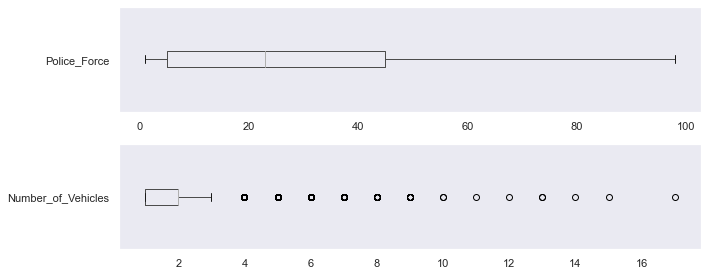

In [61]:
# outlier detection using boxplots
sns.set(style='darkgrid')
fig, axes = plt.subplots(2,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    df.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

In [70]:
# leaving outlier columns out for the time being <<<<

num_cols = [
#            u'Location_Easting_OSGR', 
#            u'Location_Northing_OSGR',
#            u'Longitude',
#            u'Latitude',
#            u'Police_Force',
            u'Accident_Severity', 
#            u'Number_of_Vehicles',
            u'Number_of_Casualties', 
#            u'Day_of_Week', 
#           u'Local_Authority_(District)', 
            u'1st_Road_Class',
            u'1st_Road_Number',
            u'Road_Type',
#            u'Speed_limit',
#            u'Junction_Detail',
#            u'Junction_Control',
#            u'2nd_Road_Class',
#            u'2nd_Road_Number',
#            u'Pedestrian_Crossing-Human_Control',
#            u'Pedestrian_Crossing-Physical_Facilities',
            u'Light_Conditions',
            u'Weather_Conditions', 
            u'Road_Surface_Conditions',
            u'Special_Conditions_at_Site', 
            u'Carriageway_Hazards',
#            u'Urban_or_Rural_Area', 
            u'Did_Police_Officer_Attend_Scene_of_Accident'
]

In [71]:
# Empty list to store columns with categorical data
categorical = []
for col, value in df.iteritems():
    if value.dtype == 'object':
        categorical.append(col)

In [72]:
categorical #accident index will be dropped, Local authority?? <<<

['Accident_Index', 'Local_Authority_(Highway)']

In [73]:
# define categorical feature columns
cat_cols = ['Daytime', 'Speed_limit', 'Urban_or_Rural_Area']

# define target col
target_col = ['Did_Police_Officer_Attend_Scene_of_Accident']

cols = cat_cols + num_cols + target_col

# copy dataframe - just to be safe
df_model = df[cols].copy()
df_model.shape

(117473, 15)

In [74]:
# Encoding categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model[num_cols], df_model[target_col], dummies], axis=1)
df_model.shape

(117473, 26)

In [75]:
#df_model.isna().sum().sum()

0

In [89]:
# define our features 
features = df_model.drop(['Did_Police_Officer_Attend_Scene_of_Accident'], axis=1)

# define our target
target = df_model[['Did_Police_Officer_Attend_Scene_of_Accident']]

In [90]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [91]:
# handling (potentially imbalanced classes)
df_model['Accident_Severity'].value_counts(normalize=True)

3    0.786589
2    0.199305
1    0.014105
Name: Accident_Severity, dtype: float64

In [92]:
# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

In [93]:
# potential need to deal with imbalanced class
#from imblearn.over_sampling import SMOTE

#oversampler = SMOTE(random_state=0)
#smote_train, smote_target = oversampler.fit_resample(train,target_train)

In [94]:
# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced')

# train
forest_1.fit(X_train, y_train)

# predict
y_test_preds  = forest_1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)

ValueError: multiclass-multioutput is not supported

In [ ]:
classifier = MultiOutputClassifier(knn, n_jobs=-1)
classifier.fit(X,Y)

In [ ]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', n_jobs=-1)